In [5]:
!pip install -r requirements.txt



  Using cached https://files.pythonhosted.org/packages/47/17/5c4b04caa8fe1dca2aa940dcc00319aa77c84fbdb71f83869a0900cac660/pandas-1.1.5-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/70/94/784178ca5dd892a98f113cdd923372024dc04b8d40abe77ca76b5fb90ca6/pytz-2021.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/16/33/e0b09b2810e355b667cd3b28850c36963735a77a431efdb2c2ca1c1c5cea/scikit_learn-0.24.1-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/f7/12/ec3f2e203afa394a149911729357aa48affc59c20e2c1c8297a60f33f133/threadpoolctl-2.1.0-py3-none-any.whl
  Found existing installation: pytz 2019.3
    Uninstalling pytz-2019.3:
      Successfully uninstalled pytz-2019.3
  Found existing installation: pandas 0.25.1
    Uninstalling pandas-0.25.1:
      Successfully uninstalled pandas-0.25.1
  Found existing installation: threadpoolctl 3.1.0
    Uninstalling threadpoolctl-3.1.0:
      Successfully uninstalled t

Nesta prática iremos apresentar o uso de embeddings. Para isso, você deve primeiro instalar as dependencias usando `pip install -r requirements.txt` (ou `pip3`, dependendo da forma que seu python está instalado).

Inicialmente, você deverá baixar os repositorios em português e inglês e salvá-los na pasta `embedding_data` seguindo as seguintes instruções: 

- [No respositório da USP](http://www.nilc.icmc.usp.br/nilc/index.php/repositorio-de-word-embeddings-do-nilc) baixe [este arquivo (Glove 100 dimensões)](http://143.107.183.175:22980/download.php?file=embeddings/glove/glove_s100.zip). Ele possui  um pouco mais de 600 mil palavras retiradas de textos de páginas Web tais como a Wikipedia e canais de notícias [(Hartmann et al., 2017)](https://arxiv.org/abs/1708.06025). Descomprima e renomeie o arquivo txt para `glove.pt.100.txt`.

- No [repositório de Stanford](https://nlp.stanford.edu/projects/glove/), baixe [este arquivo](http://nlp.stanford.edu/data/glove.6B.zip) use o arquivo . Este arquivo compreende ~400 mil palavras de textos extraidos da Wikipédia e [GigaWord](https://catalog.ldc.upenn.edu/LDC2011T07) [(Pennington et al., 2015)](https://nlp.stanford.edu/pubs/glove.pdf). Descomprima e salve o arquivo com embeddings de 100 dimensões (nome `glove.6B.100d.txt`) na pasta `embedding_data` renomeando esse arquivo para `glove.en.100.txt`.

Como você pode perceber, esta prática demandará um espaço livre em disco de aproximadamente 3GB. Os arquivos estão no seguinte formato: em cada linha, uma palavra e N valores representando o valor em cada uma das N dimensões do embedding desta palavra. Por exemplo, caso as palavras `casa`, `redondel` e `rei` sejam representadas por um embedding de 4 dimensões, uma possível representação seria:

```
casa 0.12 0.1 0.5 -0.4
redondel 0.2 0.1 -0.4 0.5
rei 0.1 0.5 -0.1 0.1
```

A função `get_embedding`, do arquivo `embeddings/utils.py` é responsável por ler esse arquivo e gerar um dicionário em que a chave é a palavra e o valor é sua representação por meio de embeddings. Para a  representação acima, a saída desta função seria seria: 

In [1]:
import numpy as np
dict_embedding_ex = {
                        "casa":np.array([0.12,0.1,0.5,-0.4]),
                        "redondel":np.array([0.2,0.1,-0.4,0.5]),
                        "rei":np.array([0.1,0.5,-0.1,0.1]),
                    }
dict_embedding_ex

{'casa': array([ 0.12,  0.1 ,  0.5 , -0.4 ]),
 'redondel': array([ 0.2,  0.1, -0.4,  0.5]),
 'rei': array([ 0.1,  0.5, -0.1,  0.1])}

Nessa função, também é salvo o objeto criado usando [pickle](https://docs.python.org/3/library/pickle.html), assim, a próxima vez que seja lido o embedding, a leitura será mais rápida.


**Atividade 1 - obtenção do embedding**: Complete a função `get_embedding` obtendo a palavra e o vetor de embeddings com a dimensão `embeddings_size` substituindo os `None` apropriadamente. O dataset possui algumas incosistencias que você deve considerar ao modificar essas linhas: no dataset em português, a maioria das palavras compostas são separadas por hífen, porém, foi verificado que umas palavras foi separado por espaço. Por caso disso, você deve considerar que as `embeddings_size` últimas posições são os valores de cada dimensão, separados por espaço e, as demais, são a palavra. Sugiro "brincar" abaixo com o uso de [índice negativo](https://www.geeksforgeeks.org/python-negative-index-of-element-in-list/) entenda também o [método join](https://www.geeksforgeeks.org/join-function-python/).

In [2]:
import numpy as np
import matplotlib
linha = "pé de moleque 0.1 -0.5 0.5 0.1 -0.5"
embedding_size = 5
arr_line = linha.strip().split()

word = " ".join(arr_line[0:(len(arr_line)-embedding_size)])
#colocamos float16 para economizar memória
embedding = np.array(arr_line[len(arr_line)-embedding_size:], dtype=np.float16)
print(f"'{word}': {embedding}")

'pé de moleque': [ 0.1 -0.5  0.5  0.1 -0.5]


Execute o teste unitário abaixo para verificar o funcionamento do `get_embeddings`

In [6]:
!python3 -m embeddings.embedding_tests TestEmbeddings.test_get_embeddings

Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.8_3.8.2800.0_x64__qbz5n2kfra8p0\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.8_3.8.2800.0_x64__qbz5n2kfra8p0\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\Willian\Desktop\RI\ap-de-maquina-embedding-master\embeddings\embedding_tests.py", line 2, in <module>
    from embeddings.utils import *
  File "C:\Users\Willian\Desktop\RI\ap-de-maquina-embedding-master\embeddings\utils.py", line 1, in <module>
    from sklearn.decomposition import PCA
ModuleNotFoundError: No module named 'sklearn'


Execute os embeddings em português e ingles. Não se preocupe com as palavras ignoradas: foram algumas inconsistencias no dataset.

In [7]:
import sys
from embeddings.utils import get_embedding, plot_words_embeddings

str_dataset = "glove.en.100.txt"
dict_embedding_en = get_embedding(str_dataset)
str_dataset = "glove.pt.100.txt"
dict_embedding_pt = get_embedding(str_dataset)

0: the
LInha com erro: 'port -0.94451 -0.41918 0.16819 -0.67172 -0.061914 -0.47964 -0.5344 0.45761 0.59723 0.51453 -0.31172 -0.44673 -0.041649 -0.098756 -0.19791 -1.4892 0.82108 -0.72552 -0.32739 0.46094 0.66842 -0.19532 0.34386 -0.50672 0.30778 -0.30816 -0.73175 -0.31235 0.19399 0.13519 -0.53491 -0.21284 0.47458 0.040454 0.38752 -0.049032 0.06913 0.46416 0.055362 -0.12081 0.055125 -1.7246 0.3235 -0.35086 0.90604 1.0472 -0.029213 -0.60464 0.79627 1.1108 0.28675 0.68702 0.40203 0.64777 -0.55304 -1.5814 -1.4324 -1.3822 1.7227 -0.15305 -0.79066 -0.24519 -0.66218 -0.38436 -0.55682 0.12663 -0.59544 0.046581 -0.3353 0.12981 -0.7238 -0.107 0.27073 -0.60108 0.36972 -0.046519 0.8031 0.3818 -0.8024 0.6256 0.44167 0.088033 -0.78446 1.1189 -0.74748 0.5858 0.30813 -0.39637 0.34147 -0.60128 0.56194 0.27767 -0.51396 -0.0075831 -0.044894 0.94605 -0.54196 -0.0074126 0.89228 0.082159
'
Palavras ignoradas: 1
LInha com erro: 'afeta -0.536855 -0.007495 -0.013442 0.010075 -0.431695 -0.954242 -0.568022 0.298

O `plot_words_embeddings` utiliza [Análise de Componentes Principais](https://pt.wikipedia.org/wiki/An%C3%A1lise_de_componentes_principais) (PCA, do inglês Principal Component Analisys) para reduzir cada embedding em 2 dimensões para, logo após, plotar em um grafico a posição dessas palavras de acordo com o embedding. Veja o grafico apresentado abaixo. 

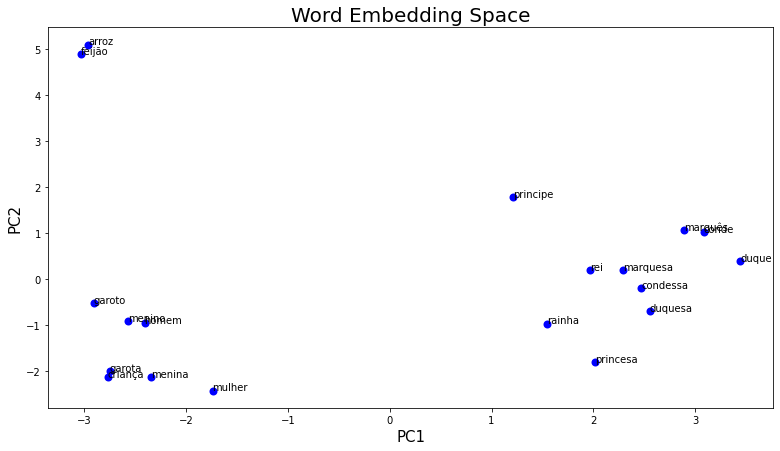

In [17]:
embeddings_to_use = {
                        "en":
                            {"embedding":dict_embedding_en,
                            "words_to_use":["prince","princess",
                                            "duchess", "duke", "countess", "marquis", 
                                            "marquise","king","queen",
                                            "girl","boy","man","woman","child",
                                           "dog","cat","mouse"]},

                        "pt":{"embedding":dict_embedding_pt,
                          "words_to_use":["principe","rei","rainha","conde","duquesa","duque","condessa",
                           "marquês","marquesa",
                           "homem","mulher","princesa","menina","menino","criança",
                           "garoto","garota",
                            "arroz","feijão"]}
                }

language = "pt"#mude de 'pt' para 'en' para ver em ingles tb!
plot_words_embeddings(embeddings_to_use[language]["embedding"], 
                    embeddings_to_use[language]["words_to_use"])

No exemplo acima, em português, veja que podemos pensar em dois conceitos claramente divididos: a realeza e o gênero. Pense, neste plano cartesiano: qual eixo corresponde ao conceito de realeza? E o de gênero? Perceba que "criança" deveria ter genero neutro - de fato, está mais próximo do zero. Porém, pode haver algum ruído associando a palavra criança ao genero feminino. Isso, em português, pode haver uma explicação, pois utilizamos  o artigo `a`, usado para palavras que remetem ao genero feminino, para se referir a criança. Assim, em português, os artigos podem aproximar uma palavra de genero neutro a um determinado genero.


Em inglês, não foi possível verificar tão bem a divisão entre os conceitos de `genero` e `realeza`. Isso pode ocorrer devido a redução de dimensionalidade: os conceitos não necessariamente correspondem a um eixo no plano cartesiano e, mesmo se corresponder, ao mapear itens com $n$ dimensões para um plano bidimensional, pode haver perda de informação. Mesmo assim, conseguimos ver a separação entre palavras da realeza e que não são da realeza. 

Sinta-se livre para "brincar", alterando/adicionando palavras. Por exemplo, adicione animais. Devido à ambiguidades, ao dataset e à própria redução de dimensionalidade, podem existir palavras que estão erroneamente próximas, se considerarmos o conceito das mesmas,  principalmente se adicionarmos palavras de conceitos muito distintos. Um detalhe: no dataset em português, há uso de palavras compostas e elas estão (geralmente) separadas por hífen. No dataset em inglês não há palavras compostas.

Tanto nesta tarefa quanto na próxima você poderá perceber que os embeddings podem carregar preconceitos. Há uma forma de modificar os vetores para eliminar um determinado tipo de preconceito. Por exemplo, nesses embeddings existirão palavras erronemente similares a um determinado genero e, para corrigir, é possível deixar todas as palavras sem distinção pelo genero. Caso queira saber como minimizar esse problema, veja o artigo "[Man is to Computer Programmer as Woman is to Homemaker? Debiasing Word Embeddings](https://arxiv.org/abs/1607.06520)". O título do artigo se remete a um preconceito descoberto ao usar analogias, que será o próximo tópico desta prática. 

## Criação de analogias

Outra caracteristica muito interessante ao usar embedding é a criação de analogias. Por exemplo, na frase `homem está para mulher assim como rei está para...`, fazendo operações com os _embeddings_, muitas vezes é possível chegar na analogia mais provável que, neste caso, seria a palavra `rainha`.



**Atividade 2 - calculo da analogia: ** Nesta atividade, iremos implementar o método `calcula_embedding_analogia` da classe `Analogy`. Essa classe tem acesso ao dicionário de embeddings e a estrutura KDTree, que iremos explicá-la posteriormente. Considerando a frase <span style="color:blue">"**palavra_x** está para **palavra_y** assim como **assim_como** esta para **palavra_z**"</span>, o método `calcula_embedding_analogia` recebe como parametro as palavras `palavra_x`, `esta_para` e `assim_ como` e retorna um embedding que, possivelmente, será muito próximo da `palavra_z`. 

Veja [na aula](https://docs.google.com/presentation/d/1-CggYUA2s7LW7_LcnGv7vlpUGFg9kEWG0j6lWGUnaLI/edit?usp=sharing) como é feito o calculo e, logo após, faça o teste unitário:

In [18]:
import numpy as np

x = np.array([[1, 2, 3],[-1.2, 3.2, 1.2],[12.2, 31.2, 11.2]], dtype=np.float16)
esta_para = np.array([[-3, 0, 1],[11, 56, 32.2],[0, 0.2, 0.4]], dtype=np.float16)
assim_como = np.array([[2, 1, 1],[0.1,0.3,0],[1.23, 0.1, 1.2]], dtype=np.float16)

for i,x_val in enumerate(x):
    arr_embedding = assim_como[i]-x[i]+esta_para[i]
    print("[",end=" ")
    for val in arr_embedding:
        print(float(val),end=", ")
    print("]")

[ -2.0, -1.0, -1.0, ]
[ 12.296875, 53.09375, 30.984375, ]
[ -10.96875, -30.90625, -9.6015625, ]


In [25]:
!python3 -m embeddings.embedding_tests TestEmbeddings.test_calculo_analogia

x: [1. 2. 3.] esta para: [-3.  0.  1.] assim_como: [2. 1. 1.]
x: [-1.2  3.2  1.2] esta para: [11.  56.  32.2] assim_como: [1. 2. 1.]
x: [12.2 31.2 11.2] esta para: [0.  0.2 0.4] assim_como: [1.23 0.1  1.2 ]
.
----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


**Atividade 3 - busca da palavra mais similar:** O calculo da atividade anterior resultou em um embedding e, agora, precisamos  procuramos a palavra mais próxima a este embedding obtido. Para isso, precisamos de: (1) uma forma eficiente para percorrer os embeddings para descobrir o mais similar; (2) uma métrica de similaridade/distancia; 

**Como percorrer embeddings?** Para encontrarmos os embeddings similares, uma alternativa seria percorrer todos os vetores de embeddings e encontrar o mais similar. Porém, como estamos trabalhando com centenas de milhares de embeddings, essa operação seria muito custosa. Para isso, podemos usar uma estrutura de dados chamada **KDTree**. KDtree é uma arvore que organiza dados espaciais de tal forma que conseguimos alcançar elementos similares de forma mais eficiente. Caso esteja interessado em mais detalhes, [veja este video](https://www.youtube.com/watch?v=Glp7THUpGow).

**Qual métrica de distancia/similaridade usaremos?**  Já foi demonstrado que esta métrica é eficiente para similaridade entre embeddings é a distancia euclidiana [(Pennington et al., 2015)](https://nlp.stanford.edu/pubs/glove.pdf). A [distancia euclidiana](https://pt.wikipedia.org/wiki/Dist%C3%A2ncia_euclidiana) entre dois pontos $p$ e $q$ é calculada por meio do tamanho da linha entre esses pontos. Para um espaço bidimensional, considerando que os pontos $p$ e $q$ são representados pelas coordenadas $(p_1,p_2)$ e $(q_1,q_2)$, respectivamente, a equação é dada pela seguinte fórmula: $d(p,q) = \sqrt{(p_1-q_1)^2+(p_2-q_2)^2}$ veja uma representação gráfica: 

<img width="400px" src="img/distancia_euclidiana.svg">

Esta métrica pode ser generalizada para um espaço n-dimensional e o cálculo seria: $d(p,q) = \sqrt{(p_1-q_1)^2+(p_2-q_2)^2+...+(p_n-q_n)^n}$. 

Assim, nesta atividade iremos utilizar [a implementação do kdtree do scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KDTree.html). Nessa estrutura, é possível armazenar os embeddings e, logo após fazer consultas eficiente para, por exemplo, procurar os k elementos mais próximos. Veja o exemplo abaixo: 

In [28]:
from sklearn.neighbors import KDTree
elementos = [[1,1],
             [2,2],
             [3,3],
             [4,4],
             [5,5],
             [6,6],
             ]
#os elementos são passados como parametro na construção do KDTree junto com a métrica 
#de distancia que iremos usar
kdtree = KDTree(elementos,  metric='euclidean')

#retorna os 2 elementos mais próximos e sua distancia
#como podemos fazer uma consulta por lista de pontos, temos que 
#passar uma lista de pontos como parametro
ponto = [3,2]
distancia,pos_mais_prox = kdtree.query([ponto], k=4, return_distance=True)
for i,pos in enumerate(pos_mais_prox[0]):
    elemento = elementos[pos]
    distancia_ponto = distancia[0][i]
    print(f"O ponto {elemento} é o {i+1}º ponto mais próximo de {ponto} distância: {distancia_ponto}")

O ponto [3, 3] é o 1º ponto mais próximo de [3, 2] distância: 1.0
O ponto [2, 2] é o 2º ponto mais próximo de [3, 2] distância: 1.0
O ponto [1, 1] é o 3º ponto mais próximo de [3, 2] distância: 2.23606797749979
O ponto [4, 4] é o 4º ponto mais próximo de [3, 2] distância: 2.23606797749979


Dessa forma, cada embedding pode ser armazenado no KTree para, logo após, obtermos os embeddings mais próximos a um embedding em questão. Não é possível armazenar na estrutura do KDTree a palavra referente a cada embedding representado, por isso, armazenamos essa estrutura como um atributo da classe `KDTreeEmbedding` (arquivo `utils.py`) que armazena também os atributos `pos_to_word` mapeando, para cada posição a palavra correspondente e o atributo `word_to_pos` que faz o oposto: mapeia, para cada palavra, a posição correspondente. Veja no construtor de `KDTreeEmbedding`  como é criado o KDTree. Nela, também será salvo um arquivo com a implementação do KDtree e os atributos `pot_to_word` e `word_to_pos` isso é necessário pois a criação da KDTree é muito custosa.


Nesta atividade, você deverá implementar `get_most_similar_embedding` que obtém as $k$ palavras mais similares à palavra (ou embedding) representado pelo parametro `query` por meio do método `query` da KDTree. O parâmetro `query` pode ser a palavra (`string`) ou o proprio embedding (`np.array`). Logo após, implemente também o método `get_embeddings_by_similarity` que utiliza o método `query_radius` ([veja documentação](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KDTree.html#sklearn.neighbors.KDTree.query_radius)) que retorna todas as palavras que estão em um raio de `max_distance` da palavra alvo especificada pelo parametro `query`. Para ambas as implementações, utiliza-se o método `positions_to_word`, já implementado, para retornar as palavras de acordo com as posições indicadas. Caso haja alguma palavra a ser ignorada em `words_to_ignore` ela será excluída também no método `positions_to_word`. 

In [29]:
!python3 -m embeddings.embedding_tests TestEmbeddings.test_get_most_similar_embedding

.
----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


In [30]:
!python3 -m embeddings.embedding_tests TestEmbeddings.test_embeddings_by_similarity

.
----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


Agora, você pode testar os métodos utilizando os datasets de embeddings. Lembre-se  que o KDTree pode demorar mais de 30 minutos para ser criado na primeira execução de cada idioma. Caso queira testar para o ingles, não esqueça de mudar de `"kdtree.pt.p"` para `"kdtree.en.p"`.

In [31]:
from embeddings.utils import get_embedding, KDTreeEmbedding
str_dataset = "glove.pt.100.txt"
kdtree_file = "kdtree.pt.p"
dict_embedding = get_embedding(str_dataset)
kdtree = KDTreeEmbedding(dict_embedding, kdtree_file)
kdtree.get_most_similar_embedding("carro")

10000: distribuída
20000: diferenciados
30000: socialite
40000: bárbaras
50000: seguro-desemprego
60000: interligada
70000: landi
80000: hurts
90000: jackeline
100000: cataluña
110000: héber
120000: calama
130000: afogue
140000: natalícios
150000: amostrada
160000: portageiros
170000: ozias
180000: banerjee
190000: crackdown
200000: kirchspielslandgemeinde
210000: yello
220000: picrodendraceae
230000: rochlitz
240000: illis
250000: oitis
260000: kalki
270000: autorizagäo
280000: goleminov
290000: mamita
300000: interessarmos
310000: cprp
320000: samitier
330000: dimitre
340000: montegranaro
350000: sanguineti
360000: wurmser
370000: villaronga
380000: zimbra
390000: salvini-plawen
400000: pankisi
410000: hi-c
420000: boggio
430000: super-pena
440000: imecc
450000: adamascados
460000: nikolaeva
470000: chi0
480000: neuropatológicas
490000: atulmente
500000: megainvestigação
510000: analista-tributário
520000: gitirana
530000: quidação
540000: baios
550000: jefa
560000: tae-hyun
570000: 

OSError: [Errno 28] No space left on device

**Atividade 5 - 💞 apresentando as analogias 💞:** Agora você deverá implementar o método `analogia` da classe `Analogy` que deverá utilizar os métodos `calcula_embedding_analogia` e o `get_most_similar_embedding` para retornar as 4 palavras mais prováveis para completar uma determinada analogia, com os parametros indicados. Caso, dentre as 4 palavras, haja uma palavra dos parametro de entrada, a mesma pode ser excluída, retorando menos palavras. Por exemplo, considerando "**rei** está para **rainha** assim como **homem** está para..." uma caso uma das palavras de saída para essaa entrada  seja `rainha`, o método poderá retornar 3 palavras (eliminando a palavra rainha). Isso já é considerado no método `get_most_similar_embedding`. Lembre-se que o método `get_most_similar_embedding` é da classe KDTreeEmbedding e a `Analogy`possui o atributo `kdtree_embedding` que é uma instancia da classe `KDTreeEmbedding`.

In [ ]:
!python3 -m embeddings.embedding_tests TestEmbeddings.test_analogy

Veja as analogias (brinque a vontantade com a representação em português e em inglês).

In [ ]:
from embeddings.utils import *
dict_embedding = get_embedding( "glove.pt.100.txt",100)
obj_analogy = Analogy(dict_embedding,"kdtree.pt.p")


dict_analogias = {("brasil","brasilia"):["peru","gana","japão","espanha","india"],
                  ("bahia","salvador"):["acre","alagoas","amapá","amazonas","ceará","goiás"],
                  ("brasil","feijoada"):["italia","estados-unidos","inglaterra","argentina","peru"],
                  ("homem","mulher"):["garoto","rei","príncipe","pai","cavalo","garçon"],
                  ("grande","pequeno"):["cheio","alto","forte","largo"],
                  ("pelé","futebol"):["tyson","bolt","senna"],
                  ("atena","sabedoria"):["afrodite","poseidon","zeus","atena"],
                  ("cruzeiro","raposa"):["atlético","gremio","palmeiras","corinthians"],
                 }

for (palavra,esta_para), arr_assim_como in dict_analogias.items():
    print(f"{palavra} está para {esta_para} assim como...")
    for assim_como in arr_assim_como:
        palavras = obj_analogy.analogia(palavra,esta_para,assim_como)
        print(f"\t{assim_como} está para {palavras[0]} (ou {palavras[1:]})")


Uma limitação desses embeddings é a dependencia de idioma e que palavras ambiguas não são tratadas. Por exemplo, Jaguar pode ser uma marca de carro ou animal, dependendo do contexto.  Para diminuir o problema de ambuiguidades, o [BERT](https://towardsml.com/2019/09/17/bert-explained-a-complete-guide-with-theory-and-tutorial/) é um embedding que a representação da palavra é diferente de acordo com o seu contexto. O [MUSE](https://github.com/facebookresearch/MUSE) é um embedding multilingue.

## Representação textual usando embedding

Muitas vezes, precisamos de um único vetor para representar uma frase ou um texto ainda maior. Para isso, podemos usar a representação Bag of Words ou, ainda, representar por palavras chaves ou utilizarmos uma combinação de nossas representações por palavras. Neste tutorial, iremos mostrar como combinar embeddings de palavras e usar a representação por palavras chaves - podendo, inclusive, fazer uma expansão de palavras chaves por embeddings.

Para isso, iremos usar o seguinte contexto: por meio de um dataset de revisões de produto da amazon, deseja-se prever automaticamente o sentimento do mesmo (positivo ou negativo). Utilizou-se uma amostra do [dataset do Kaggle para este exemplo](https://www.kaggle.com/bittlingmayer/amazonreviews). Veja abaixo o dataset: 

In [ ]:
import pandas as pd

df_amazon_reviews = pd.read_csv("datasets/amazon_reviews_mini.txt",index_col="id")
df_amazon_reviews

Em um método de aprendizado de maquina, cada instancia deve ser representada por um vetor numérico utilizando as representações ditas anteriormente. Iremos ilustrar cada exemplo utilizando uma pequena subamostra desta amostra com 5 exemplos positivos e 5 negativos: 

In [ ]:
df_positive = df_amazon_reviews[df_amazon_reviews["class"]=="positive"][:5]
df_negative = df_amazon_reviews[df_amazon_reviews["class"]=="negative"][:5]
df_amazon_mini = pd.concat([df_positive,df_negative])
df_amazon_mini

**Bag of words: ** um exemplo simples, sem usar embeddings, é a representação em bag of words, **já discutido aqui**. Assim, podemos  usar a classe `BagOfWords` que está no arquivo `textual_representation.py`. Para as representações bag of words, usaremos a função bag_of_words abaixo. Usando esta representação o nosso dataset ficaria representado da seguinte forma: 

In [ ]:
from embeddings.textual_representation import BagOfWords
#o vocabulario, quando vazio, será considerado todas as palavra (menos stopwords)
def bag_of_words(data, vocabulary=None):
    #obtem stopwords
    stop_words = set()
    with open("datasets/stopwords.txt") as stop_file:
        stop_words = set(stop_word[:-1] for stop_word in stop_file)

    #instancia o bag of words, filtrando stopwords e considerando o vocabulario (se possivel)
    bow = BagOfWords("bow", stop_words=list(stop_words), words_to_consider=vocabulary)
    
    #o bag of words, é gerado separadamente a representação do treino e teste
    #iremos usar apenas a representação considerando que "data" é o treino
    data_preproc = bow.preprocess_train_dataset(data, "class")

    #exibe apenas colunas não zedadas
    m2 = (data_preproc != 0).any()
    data_preproc = data_preproc[m2.index[m2].tolist()]
    
    return data_preproc
bag_of_words(df_amazon_mini)

**Bag of words (filtrado por palavras chaves e embeddings similares)** Como bag of words é uma representação com milhares de atributos, poderiamos fazer uma restrição por palavras chaves. Por exemplo, caso usássemos como vocabulário do bag of words baseado nas palavras obtidas da roda de emoções porposta por [Scherer K., (2005)](https://journals.sagepub.com/doi/pdf/10.1177/0539018405058216): 

In [ ]:
emotion_words = {
                    "pride":{"proud"},
                    "elation":{"ecstatic", "euphoria", "exaltation", "exhilarating"},
                    "happiness":{"joy","cheer", "bliss", "delight", "enjoy", "happy"},
                    "satisfaction":{"comfortable","contentment"},
                    "relief":{},
                    "hope":{"buoyancy", "confident", "faith", "optimistic"},
                    "interest":{"alert", "animation", "ardor", "curious","enthusiasm"},
                    "surprise":{"amazed", "astonishing", "dumbfounded","thunderstruck"},
                    "anxiety":{"anguish","anxiety","apprehensive","jittery","nervous","worry"},
                    "sadness":{"chagrin", "dejected", "gloom", "hopeless", "melancholy", "sad", "tear"},
                    "boredom":{"ennui","indifference","tedious"},
                    "shame":{"abashed", "ashamed", "embarrassing", "humiliating"},
                    "guilt":{"blame", "contrition", "remorse"},
                    "disgust":{"abhor", "aversion", "dislike", "disrelish", "nausea","sick"},
                    "contempt":{"denigration","depreciate","derision","disdain","scorn"},
                    "hostile":{},
                    "anger":{"anger","angry","furious","fury","incense","infuriating",
                                "mad","rage","resent","temper","wrath"},
                    "recognition":{"respect","acknowledgement"}
            }

vocabulary = []
for emotion_group, set_keywords in emotion_words.items():
    vocabulary.append(emotion_group)
    for word in set_keywords:
        vocabulary.append(word)
vocabulary = set(vocabulary)
", ".join(vocabulary)

O grande problema é que esse grupo de palavras é muito restrito. Veja como ficou a representação dos nossos dados:

In [ ]:
bag_of_words(df_amazon_mini,vocabulary)

Lembre-se que eliminamos as palavras que não apareceram em nenhuma instancia. Assim, como pode-se observar, apenas duas palavras foram usadas e alguns documentos não possuiam nenhuma palavra. Para ampliar o vocabulário, poderiamos expandir esta representação usando palavras similares a estas de acordo com o nosso embedding: 

In [ ]:
from embeddings.utils import get_embedding, KDTreeEmbedding
dict_embedding = get_embedding("glove.en.100.txt")
kdtree_embedding = KDTreeEmbedding(dict_embedding, "kdt_en.p")

In [ ]:
vocabulary_expanded = []
for word in vocabulary:
    #obtem as 40 mais similares palavras de cada uma do vocab original
    _,words = kdtree_embedding.get_most_similar_embedding(word,40)
    vocabulary_expanded.extend(words)
vocabulary_expanded = set(vocabulary_expanded)

Veja aqui as palavras usadas: 

In [ ]:
", ".join(vocabulary_expanded)

Algumas palavras podem não estar relacionadas à emoção, porém, o método de aprendizado de máquina ainda é capaz de considerar palavras mais relevantes para uma determinada instancia, ignorando algum ruído. Veja como ficou a representação: 

In [ ]:
bag_of_words(df_amazon_mini,vocabulary_expanded)

Poderiamos agrupar as palavras chaves em conceitos, por exemplo, "happiness" ser sempre contabilizado quando houver um conjunto de palavras, por exemplo, '"joy","cheer", "bliss", "delight", "enjoy", "happy"'. Porém, isso pode restringir muito o número de palavras e expandir com palavras usando embeddings, pode extrair palavras relacionadas com a emoção oposta (veja exemplo abaixo). Por isso, optamos por apresentar a representação usando bag of words. Mesmo assim, caso queira ver algum resultado dessa forma, a classe CountWords implementa expansão por grupos de palavras chaves. 

In [ ]:

distance, words = kdtree_embedding.get_most_similar_embedding("happy",40)
#veja que unhappy é relacionado com happy - além de outras palavras negativas e ruido
", ".join(words)

In [ ]:
from embeddings.textual_representation import CountWords,InstanceWisePreprocess
aggregate = CountWords(dict_embedding, emotion_words,max_distance=0.3)

word_counter = InstanceWisePreprocess("word-counter",aggregate)
word_counter.preprocess_train_dataset(df_amazon_mini, "class")

O max_distance é resposável por obter as palavras similares. Veja que diversos documentos negativos foram classficados com o grupo "happiness". 

**Representação agregando embeddings das palavras: ** Conforme proposto por [Shen et al.](https://arxiv.org/pdf/1805.09843.pdf), dado que uma frase é representado por um conjunto de embeddings $\{e_1, e_2, ..., e_n\}$  uma forma simples e que geralmente obtém resultados **comparáveis a métodos mais complexos** é fazer operações em cada dimensão do embedding, tais como: média e máximo por dimensão do embedding. Por exemplo: 

In [ ]:
#embeddings de alguams palavras: 
dict_embedding = {'my':      [10, 11,14, 20, 15, 80],
                  'house':   [11, 12,10, 24, 11, 30],
                  'is':      [1,  3,  5, -1, 10, 20],
                  'green':   [12,10, 20, 12, 10, 20]
                   }
#representação do texto "my house is green"
arr_texto = "my house is green".split()
arr_texto      

**Usando a média de cada dimensão dos embeddings:** 

In [ ]:

def average_pooling(arr_texto, dim_embedding):
    representacao = []
    for i in range(dim_embedding):
        #calcula a média da iésima posição do embedding
        sum_pos = 0
        for word in arr_texto:
            sum_pos += dict_embedding[word][i]

        representacao.append(sum_pos/len(arr_texto))
    return representacao
dim_embedding = 6
representacao = average_pooling(arr_texto, dim_embedding)
print(f"Representação: {representacao}")

**Usando o máximo de cada dimensão dos embeddings:**

In [ ]:
dim_embedding = 6
def max_pooling(arr_texto, dim_embedding):
    representacao = []
    for i in range(dim_embedding):
        #calcula o valor máximo de cada iésima posição do embedding
        first_word = arr_texto[0]
        max_pos = dict_embedding[first_word][i]
        for word in arr_texto[1:]:
            if max_pos < dict_embedding[word][i]:
                max_pos = dict_embedding[word][i]

        representacao.append(max_pos)
    return representacao
representacao = max_pooling(arr_texto, dim_embedding)
print(f"Representação: {representacao}")

Como há palavras pouco relevantes (como stopwords) podemos remove-las e, também podemos utilizar apenas as palavras de um vocabulario controlado. Abaixo veja a representação. Como esta representação é vetorial, a mesma não é uma representação simples de ser entendida por humanos, porém, pode-se obter bons resultados. Você pode adicionar o vocabulario controlado ou as stopwords por meio dos parametros correpondentes. O parametro `aggregate_method` define se será feito um maximo ou média entre os embeddings colocando os valores `max` ou `avg`, respectivamente. 

In [ ]:
from embeddings.textual_representation import AggregateEmbeddings,InstanceWisePreprocess
dict_embedding = get_embedding("glove.en.100.txt")
aggregate_keywords_exp = AggregateEmbeddings(dict_embedding, aggregate_method="avg", 
                                            words_to_filter=stop_words, words_to_consider=vocabulary_expanded)
emb_keywords_exp = InstanceWisePreprocess("emb_keywords_exp",aggregate_keywords_exp)
emb_keywords_exp.preprocess_train_dataset(df_amazon_mini, "class")

## Avaliação por meio de um método de aprendizado de máquina

Os embeddings podem oferecer uma informação de proximidade de conceitos que o uso de Bag of Words não seria capaz. Mesmo assim, cada representação e preprocessamento tem sua vantagem e desvantagem e não existe um método que será sempre o melhor. Assim, para sabermos qual representação é melhor para uma tarefa, é importante avaliarmos em quais delas são maiores para a tarefa em questão. Como o foco desta prática não é a avaliação, iremos apenas apresentar o resultado, caso queira, você pode [assistir a video aula](https://www.youtube.com/watch?v=Ag06UuWTsr4&list=PLwIaU1DGYV6tUx10fCTw5aPnqypbbK_GJ&index=12) e [fazer a prática sobre avaliação](https://github.com/daniel-hasan/ap-de-maquina-cefetmg-avaliacao/archive/master.zip). Nesta parte, iremos apenas usar a avaliação para verificar qual método é melhor.  

Para que esta seção seja auto contida, iremos fazer toda a preparação que fizemos nas seções anteriores

**Criação da lista de stopwords e de vocabulário:**

In [ ]:
from embeddings.utils import get_embedding, KDTreeEmbedding

emotion_words = {
                    "pride":{"proud"},
                    "elation":{"ecstatic", "euphoria", "exaltation", "exhilarating"},#vs boredom
                    "happiness":{"joy","cheer", "bliss", "delight", "enjoy", "happy"},#vs sad
                    "satisfaction":{"comfortable","contentment"},#
                    "relief":{},
                    "hope":{"buoyancy", "confident", "faith", "optimistic"},
                    "interest":{"alert", "animation", "ardor", "curious","enthusiasm"},
                    "surprise":{"amazed", "astonishing", "dumbfounded","thunderstruck"},
                    "anxiety":{"anguish","anxiety","apprehensive","jittery","nervous","worry"},
                    "sadness":{"chagrin", "dejected", "gloom", "hopeless", "melancholy", "sad", "tear"},
                    "boredom":{"ennui","indifference","tedious"},
                    "shame":{"abashed", "ashamed", "embarrassing", "humiliating"},
                    "guilt":{"blame", "contrition", "remorse"},
                    "disgust":{"abhor", "aversion", "dislike", "disrelish", "nausea","sick"},
                    "contempt":{"denigration","depreciate","derision","disdain","scorn"},
                    "hostile":{},
                    "anger":{"anger","angry","furious","fury","incense","infuriating",
                                "mad","rage","resent","temper","wrath"},
                    "recognition":{"respect","acknowledgement"}
            }
dict_embedding = get_embedding("glove.en.100.txt") 
kdtree_embedding = KDTreeEmbedding(dict_embedding, "kdt_en.p")

#obtem as stopwords
stop_words = set()
with open("datasets/stopwords.txt") as stop_file:
    stop_words = set(stop_word[:-1] for stop_word in stop_file)


#palavras chaves a serem consideradas
set_vocabulary = set()
for key_word, arr_related_words in emotion_words.items():
    set_vocabulary.add(key_word)
    set_vocabulary = set_vocabulary | set(arr_related_words)

#kdtree - para gerar o conjunto com palavras chaves e suas similares
vocabulary_expanded = []
for word in set_vocabulary:
    _, words = kdtree_embedding.get_most_similar_embedding(word,60)
    vocabulary_expanded.extend(words)
vocabulary_expanded = set(vocabulary_expanded)



**Representações usadas**:Iremos avaliar a filtragem de stopwords e usando um vocabulário restrito da representação bag of words e também da representação usando a média de embeddings.

In [ ]:
from embeddings.textual_representation import BagOfWords, AggregateEmbeddings,InstanceWisePreprocess

#gera as representações
aggregate = AggregateEmbeddings(dict_embedding, "avg")
embedding = InstanceWisePreprocess("embbeding",aggregate)

aggregate_stop = AggregateEmbeddings(dict_embedding, "avg",words_to_filter=stop_words)
emb_nostop = InstanceWisePreprocess("emb_nostop",aggregate_stop)


aggregate_keywords_exp = AggregateEmbeddings(dict_embedding, "avg",words_to_consider=vocabulary_expanded)
emb_keywords_exp = InstanceWisePreprocess("emb_keywords_exp",aggregate_keywords_exp)

bow_keywords = BagOfWords("bow_keywords_exp", words_to_consider=vocabulary_expanded)
bow = BagOfWords("bow", stop_words=stop_words)

arr_representations = [embedding,emb_nostop, emb_keywords_exp, bow,bow_keywords]

In [ ]:
import pandas as pd
pd.read_csv("datasets/amazon_reviews_mini.txt",index_col="id")

Abaixo, é executado um método de aprendizado  para cada representação. Esse processo pode demorar um pouco pois é feito a procura do melhor parametro do algoritmo. Algumas otimizações que talvez, você precise fazer é no arquivo `embedding/avaliacao_embedding.py` alterar o parametro `n_jobs` no método `obtem_metodo` da classe `OtimizacaoObjetivoRandomForest`. Esse parametro é responsável por utiizar mais threads ao executar o Random Forests.  O valor pode ser levemente inferior a quantidades de núcleos que seu computador tem, caso ele tenha mais de 2, caso contrário, o ideal é colocarmos `n_jobs=1`. Caso queira visualizar resultados mais rapidamente, diminua o valor da variável `num_trials` e `num_folds` abaixo. Atenção que `num_folds` deve ser um valor maior que um.

In [ ]:
import pandas as pd
import optuna
from embeddings.avaliacao_embedding import calcula_experimento_representacao, OtimizacaoObjetivoRandomForest

# Método de aprendizado de máquina a ser usado
dict_metodo = {"random_forest":{"classe_otimizacao":OtimizacaoObjetivoRandomForest,
                                "sampler":optuna.samplers.TPESampler(seed=1, n_startup_trials=10)},
              }
df_amazon_reviews = pd.read_csv("datasets/amazon_reviews_mini.txt",index_col="id")

#executa experimento com a representacao determinada e o método
for metodo, param_metodo in dict_metodo.items():
    for representation in arr_representations:
        print(f"===== Representação: {representation.nome}")
        col_classe = "class"
        num_folds = 5
        num_folds_validacao = 3
        num_trials = 100


        nom_experimento = f"{metodo}_"+representation.nome
        experimento = calcula_experimento_representacao(nom_experimento,representation,df_amazon_reviews,
                                            col_classe,num_folds,num_folds_validacao,num_trials,
                                            ClasseObjetivoOtimizacao=param_metodo['classe_otimizacao'],
                                                sampler=param_metodo['sampler'])
        print(f"Representação: {representation.nome} concluida")

Como a experimentação é uma tarefa custosa, todos os resultados são salvos na pasta "resultados" - inclusive os valores dos parametros na classe optuna (a prática de avaliação apresenta mais detalhes da biblioteca Optuna). A macro f1 é uma métrica relacionada a taxa de acerto (se necessário, [veja a explicação neste video - tópico 2 e 3)](https://www.youtube.com/watch?v=u7o7CSeXaNs&list=PLwIaU1DGYV6tUx10fCTw5aPnqypbbK_GJ&index=13). Analise os resultados abaixo: qual representação foi melhor? A restrição de vocabulário ou eliminação de stopwords auxiliou? 

In [ ]:
import os
import pandas as pd
from base_am.avaliacao import Experimento

arr_resultado = []
for resultado_csv in os.listdir("resultados"):
    if resultado_csv.endswith("csv"):
        nom_experimento = resultado_csv.split(".")[0]
        
        #carrega resultados previamente realizados
        experimento = Experimento(nom_experimento,[])
        experimento.carrega_resultados_existentes()
        
        #adiciona experimento
        num_folds = len(experimento.resultados)
        dict_resultados = {"nom_experimento":nom_experimento, 
                            "macro-f1":sum([r.macro_f1 for r in experimento.resultados])/num_folds}
        #resultados por classe
        for classe in experimento.resultados[0].mat_confusao.keys():

            dict_resultados[f"f1-{classe}"] = sum([r.f1_por_classe[classe] for r in experimento.resultados])/num_folds
            dict_resultados[f"precision-{classe}"] = sum([r.precisao[classe] for r in experimento.resultados])/num_folds
            dict_resultados[f"recall-{classe}"] = sum([r.revocacao[classe] for r in experimento.resultados])/num_folds

        arr_resultado.append(dict_resultados)

pd.DataFrame.from_dict(arr_resultado)

## Bibliografia

Bolukbasi, T., Chang, K. W., Zou, J., Saligrama, V., & Kalai, A. (2016). **[Man is to computer programmer as woman is to homemaker? Debiasing word embeddings](https://arxiv.org/abs/1607.06520)**. 

Hartmann, N., Fonseca, E., Shulby, C., Treviso, M., Rodrigues, J., & Aluisio, S. (2017). [**Portuguese word embeddings: Evaluating on word analogies and natural language tasks.**](https://arxiv.org/abs/1708.06025)


Pennington, J., Socher, R., & Manning, C. D. (2014, October).**[GloVe: Global Vectors for Word Representation](https://nlp.stanford.edu/pubs/glove.pdf)**. In EMNLP 2015 


Scherer, Klaus R. **[What are emotions? And how can they be measured?](https://journals.sagepub.com/doi/pdf/10.1177/0539018405058216)**. Social science information, v. 44, n. 4, p. 695-729, 2005.

Shen, D., Wang, G., Wang, W., Min, M. R., Su, Q., Zhang, Y., Carin, L. (2018). [Baseline needs more love: On simple word-embedding-based models and associated pooling mechanisms](https://arxiv.org/pdf/1805.09843.pdf).




<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Licença Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br />Este obra está licenciado com uma Licença <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Atribuição-CompartilhaIgual 4.0 Internacional</a>.